In [1]:
from manim import *
import jupyter_capture_output
import pandas as pd

video_scene = " -v WARNING  --disable_caching convolution_Scene"
image_scene = f" -v WARNING --disable_caching -r {2*427},{2*240}  -s convolution_Scene"

Jupyter Capture Output v0.0.11


In [ ]:
sleep_data = pd.read_csv("../external_media/SleepMonth.csv", nrows = 35)
sleep_duration = sleep_data["Duration"]


# returns the sleep duration in hours for a given Garmin duration string
def duration_parser(duration):
    hours_string, mins_string = duration.split(" ")
    h_duration = int(hours_string[:-1]) + float(mins_string[:-3])/60
    return h_duration

In [65]:
sleep0 = sleep_duration[0]
duration_parser(sleep0)
sleep_duration
sleep_duration[::-1]

34    6h 43min
33    7h 24min
32    7h 13min
31    6h 29min
30     7h 3min
29    6h 56min
28    7h 19min
27    6h 34min
26    8h 52min
25     7h 7min
24    6h 44min
23    7h 48min
22    7h 42min
21    5h 58min
20    6h 57min
19    7h 14min
18    7h 58min
17    6h 11min
16    7h 17min
15    6h 14min
14    5h 23min
13    7h 13min
12    6h 59min
11    5h 43min
10    5h 19min
9      8h 9min
8     8h 25min
7     7h 59min
6     6h 53min
5     8h 39min
4      5h 0min
3     7h 45min
2     8h 12min
1     6h 47min
0     6h 56min
Name: Duration, dtype: object

Manim Community v0.18.1

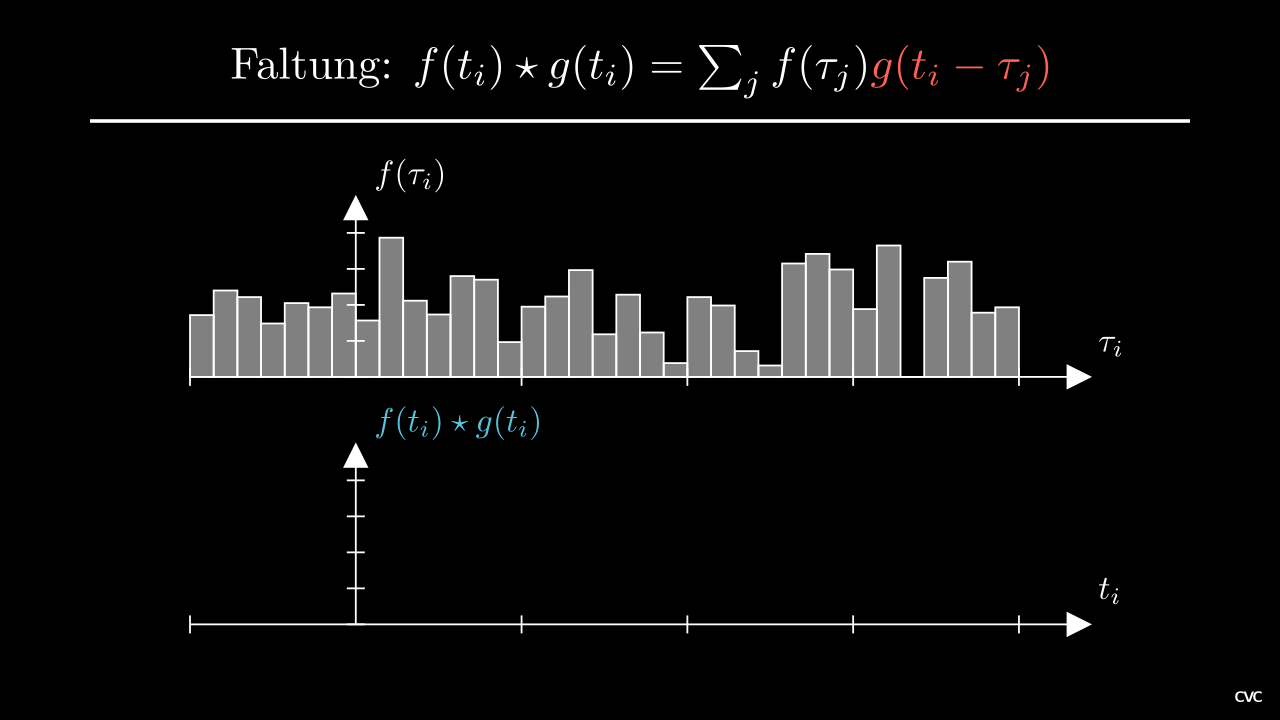

In [75]:
%%manim -qm --fps 60 $video_scene


class convolution_Scene(Scene):
	def construct(self):
		CVC = Text('CVC', font_size = 12, weight = BOLD, color = WHITE, font = 'Latin Modern Sans').align_on_border(RIGHT + DOWN, buff = 0.2)
		self.add(CVC)

		# headline
		headline = Title(r"Faltung: $f(t_i)\star g(t_i)=\sum_j f(\tau_j)g(t_i-\tau_j)$", font_size = 48).align_on_border(UP + LEFT, buff = 0.5).shift(0.5 * RIGHT)
		# headline[0][21:26].set_color(BLUE)
		headline[0][27:35].set_color(RED)
		self.add(headline)


		# coordinate system
		x_length = 10
		y_length = 2
		x_range = [-7, 4*7+3, 7]
		y_range = [5, 10, 1]

		# x_dict = dict(zip([0, L/2, L], [r"0", r"L/2", r"L"]))
		# y_dict = dict(zip([0, A], [r"0", r"A"]))

		ax = Axes(x_length = x_length, y_length = y_length, x_range = x_range, y_range = y_range, tips = True, axis_config = {"include_ticks": True, "tip_width": 0.25, "tip_height": 0.25}).move_to([0, 0.75, 0])
		ax_xlabel = ax.get_x_axis_label(Tex(r"$\tau_i$", font_size = 36, color = WHITE))
		ax_ylabel = ax.get_y_axis_label(Tex(r"$f(\tau_i)$", font_size = 36, color = WHITE))
		self.add(ax, ax_xlabel, ax_ylabel)


		ax_conv = Axes(x_length = x_length, y_length = y_length, x_range = x_range, y_range = y_range, tips = True, axis_config = {"include_ticks": True, "tip_width": 0.25, "tip_height": 0.25}).move_to([0, -2, 0])
		ax_conv_xlabel = ax_conv.get_x_axis_label(Tex(r"$t_i$", font_size = 36, color = WHITE))
		ax_conv_ylabel = ax_conv.get_y_axis_label(Tex(r"$f(t_i)\star g(t_i)$", font_size = 36, color = BLUE))
		self.add(ax_conv, ax_conv_xlabel, ax_conv_ylabel)


		def get_rect(t, f, color):
			bl = ax.c2p(t, 5)
			tl = ax.c2p(t, f)
			tr = ax.c2p(t+1, f)
			br = ax.c2p(t+1, 5)
			return Polygon(bl, tl, tr, br, stroke_color = color, fill_color = color, fill_opacity = 0.5, stroke_width = 2)


		for i, sleep_string in enumerate(sleep_duration[::-1]):
			h_sleep = duration_parser(sleep_string)
			rect_sleep = get_rect(i-7, h_sleep, WHITE)
			self.add(rect_sleep)
